### Initialize Spark Session 

In [1]:
# initialize spark session
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration4').getOrCreate()

### Data Import and Exploration
    import types from pyspark.sql.type:
        StructField('col', DataType, nullable=True)
        StructType(fields=StructField)
    spark.read.csv('file', schema=StructType)
    spark.read.csv('file', inferSchema=True)
    spark.read.format().load('file'): specify format of file
    df.show(n): visualise data frame
    df.head()
    df.columns(): check columns
    df.count(): check number of rows
    df.describe('col').show(): summary of col
    df.printSchema(): check data type

In [80]:
# import without schema
df_noschema = spark.read.csv('dataset.csv', header=True)

In [212]:
from pyspark.sql.types import (StructField, StructType,
                               TimestampType, IntegerType, FloatType)
# define data schema (or use inferSchema =True when loading dataframe)
data_schema = [StructField('instant', IntegerType(), True),
               StructField('dteday', TimestampType(), True),
               StructField('season', IntegerType(), True),
               StructField('yr', IntegerType(), True),
               StructField('mnth', IntegerType(), True),
               StructField('hr', IntegerType(), True),
               StructField('holiday', IntegerType(), True),
               StructField('weekday', IntegerType(), True),
               StructField('workingday', IntegerType(), True),
               StructField('weathersit', IntegerType(), True),
               StructField('temp', FloatType(), True),
               StructField('atemp', FloatType(), True),
               StructField('hum', FloatType(), True),
               StructField('windspeed', FloatType(), True),
               StructField('casual', IntegerType(), True),
               StructField('registered', IntegerType(), True),
               StructField('cnt', IntegerType(), True)]

final_struct = StructType(fields = data_schema)
#import with self-defined schema
df_withschema = spark.read.csv('dataset.csv', schema=final_struct, header=True)

In [3]:
# import with inferred schema automatically, only for csv
df = spark.read.csv('dataset.csv', header=True, inferSchema=True)

In [13]:
df.show(10) #df.head()

+-------+--------+------+---+----+---+-------+-------+----------+----------+----+------+----+---------+------+----------+---+
|instant|  dteday|season| yr|mnth| hr|holiday|weekday|workingday|weathersit|temp| atemp| hum|windspeed|casual|registered|cnt|
+-------+--------+------+---+----+---+-------+-------+----------+----------+----+------+----+---------+------+----------+---+
|   null|2011/1/1|     1|  0|   1|  0|      0|      6|         0|         1|0.24|0.2879|0.81|      0.0|     3|        13| 16|
|      2|2011/1/1|     1|  0|   1|  1|      0|      6|         0|         1|0.22|  null| 0.8|      0.0|     8|        32| 40|
|      3|2011/1/1|     1|  0|   1|  2|      0|      6|         0|         1|0.22|0.2727|null|      0.0|     5|        27| 32|
|      4|2011/1/1|     1|  0|   1|  3|      0|      6|         0|         1|0.24|0.2879|0.75|      0.0|     3|        10| 13|
|      5|2011/1/1|     1|  0|   1|  4|      0|      6|         0|         1|0.24|0.2879|0.75|      0.0|     0|        

In [8]:
# check number of records
df.count()

17379

In [11]:
# check features and data type
df.printSchema() #df.columns & df.dtypes

root
 |-- instant: integer (nullable = true)
 |-- dteday: string (nullable = true)
 |-- season: integer (nullable = true)
 |-- yr: integer (nullable = true)
 |-- mnth: integer (nullable = true)
 |-- hr: integer (nullable = true)
 |-- holiday: integer (nullable = true)
 |-- weekday: integer (nullable = true)
 |-- workingday: integer (nullable = true)
 |-- weathersit: integer (nullable = true)
 |-- temp: double (nullable = true)
 |-- atemp: double (nullable = true)
 |-- hum: double (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)
 |-- cnt: integer (nullable = true)



In [16]:
# data summary
df.describe('instant', 'temp', 'atemp', 'hum', 'windspeed', 'cnt').show()

+-------+-----------------+-------------------+-------------------+-------------------+-------------------+------------------+
|summary|          instant|               temp|              atemp|                hum|          windspeed|               cnt|
+-------+-----------------+-------------------+-------------------+-------------------+-------------------+------------------+
|  count|            13411|              16879|              16655|              16664|              17379|             17379|
|   mean|8742.028782342853|0.49789324012086394| 0.4771872830981645| 0.6233845415266452| 0.1900976063064631|189.46308763450142|
| stddev|5057.902777166932|0.19198569516113423|0.17226178748927362|0.19323537329268173|0.12234022857279034| 181.3875990918646|
|    min|                2|               0.02|                0.0|                0.0|                0.0|                 1|
|    max|            17379|                1.0|                1.0|                1.0|             0.8507|    

### Data Operation
    df.col / df['col']: pick a column
    df.select('col'): subset a dataframe
    df.withColumn('col', fun): add column
    df.withColumnRenamed('col', 'new_col'): rename col
    df.filter(condition): filter rows
    .collect()
    df.groupBy('col'): group data by values in 'col'
    df.groupBy('col1').fun('col2'): group by 'col1' then do fun on 'col2'
    df.agg({'col':"fun"}): do fun on values in 'col' (not grouping)
    df.ordrBy('col'): sort data by values in 'col' (same as df.sort())
    df.sort('col', ascending=False) or df.sort(df.col.desc())

### Data Cleaning
    df.drop(subset): drop columns
    df.na.drop(thresh, how, subset): drop rows with na
    df.na.fill('value', subset): better to fill missing values with the mean

In [158]:
# Data Select
df.drop('instant').printSchema()

root
 |-- dteday: string (nullable = true)
 |-- season: integer (nullable = true)
 |-- yr: integer (nullable = true)
 |-- mnth: integer (nullable = true)
 |-- hr: integer (nullable = true)
 |-- holiday: integer (nullable = true)
 |-- weekday: integer (nullable = true)
 |-- workingday: integer (nullable = true)
 |-- weathersit: integer (nullable = true)
 |-- temp: double (nullable = true)
 |-- atemp: double (nullable = true)
 |-- hum: double (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)
 |-- cnt: integer (nullable = true)



In [160]:
print(df.count())
# dorp any rows with missing data
print(df.na.drop().count())
# drop a row if a value from a particular row is missing
print(df.na.drop(subset='instant').count())

17379
12069
13411


In [131]:
from pyspark.sql.functions import mean
mean_temp = df.select(mean(df['temp'])).collect()
mean_atemp = df.select(mean(df['atemp'])).collect()
mean_hum = df.select(mean(df['hum'])).collect()
mean_windspeed = df.select(mean(df['windspeed'])).collect()

In [134]:
# it's a list
type(mean_temp)
mean_temp[0][0]
# get the value
mean_temp_value = mean_temp[0][0]

0.49789324012086394

In [188]:
# do it again
from pyspark.sql.functions import mean
mean_temp = df.select(mean(df.temp)).collect()[0][0]
mean_atemp = df.select(mean(df.atemp)).collect()[0][0]
mean_hum = df.select(mean(df.hum)).collect()[0][0]
mean_windspeed = df.select(mean(df.windspeed)).collect()[0][0]

In [189]:
df.na.fill(mean_temp, subset='temp').describe('temp').show()

+-------+-------------------+
|summary|               temp|
+-------+-------------------+
|  count|              17379|
|   mean|0.49789324012086117|
| stddev|0.18920363048478592|
|    min|               0.02|
|    max|                1.0|
+-------+-------------------+



In [162]:
# we need fill 4 fields, put a dict as value
mean_filled = {'temp': mean_temp, 'atemp': mean_atemp,
               'hum': mean_hum, 'windspeed': mean_windspeed}
df.na.fill(mean_filled).describe(['temp', 'atemp', 'hum', 'windspeed']).show()

+-------+-------------------+-------------------+-------------------+-------------------+
|summary|               temp|              atemp|                hum|          windspeed|
+-------+-------------------+-------------------+-------------------+-------------------+
|  count|              17379|              17379|              17379|              17379|
|   mean|0.49789324012086117| 0.4771872830981634|   0.62338454152664| 0.1900976063064631|
| stddev|0.18920363048478592|0.16863523924975896|0.18921838489870607|0.12234022857279034|
|    min|               0.02|                0.0|                0.0|                0.0|
|    max|                1.0|                1.0|                1.0|             0.8507|
+-------+-------------------+-------------------+-------------------+-------------------+



### Linear Regression Basic
    pyspark.ml.regression
    spark.read.format('libsvm').load('file')
    format libsvm: 
        the predictor in 'label' column 
        group all other features into 'feature' column as a vector
    train, test = data.randomSplit([0.8, 0.2]): split data to train and test
    LinearRegression(featuresCol, labelCol, predictonCol)
        .fit(train): fit model with train
            .coefficients & .intercept: y=intercept + coefficients * x
            .summary.residuals
            .summary.rootMeanSquareError & .summary.r2
            .evaluate(test) #evaluate on test
                .residuals, .rootMeanSquareError .r2

In [3]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_docs').getOrCreate()

from pyspark.ml.regression import LinearRegression

In [27]:
data = spark.read.format('libsvm').load(
    '../aws-instance/Datasets/sample_linear_regression_data.txt')
data.show(3)

+------------------+--------------------+
|             label|            features|
+------------------+--------------------+
|-9.490009878824548|(10,[0,1,2,3,4,5,...|
|0.2577820163584905|(10,[0,1,2,3,4,5,...|
|-4.438869807456516|(10,[0,1,2,3,4,5,...|
+------------------+--------------------+
only showing top 3 rows



+------------------+--------------------+
|             label|            features|
+------------------+--------------------+
|-9.490009878824548|(10,[0,1,2,3,4,5,...|
|0.2577820163584905|(10,[0,1,2,3,4,5,...|
|-4.438869807456516|(10,[0,1,2,3,4,5,...|
+------------------+--------------------+
only showing top 3 rows



In [20]:
# model setup
lr = LinearRegression(featuresCol='features', labelCol='label',
                     predictionCol='prediction')
# fit model
lrModel = lr.fit(data)
# model coefficients
print('coefficients:', lrModel.coefficients)
# model intercept: 
print('intercept:', lrModel.intercept)

coefficients: [0.0073350710225801715,0.8313757584337543,-0.8095307954684084,2.441191686884721,0.5191713795290003,1.1534591903547016,-0.2989124112808717,-0.5128514186201779,-0.619712827067017,0.6956151804322931]
intercept: 0.14228558260358093


In [23]:
# residuals: 残差
lrModel.summary.residuals.show()

+-------------------+
|          residuals|
+-------------------+
|-11.011130022096554|
| 0.9236590911176538|
|-4.5957401897776675|
|  -20.4201774575836|
|-10.339160314788181|
|-5.9552091439610555|
|-10.726906349283922|
|  2.122807193191233|
|  4.077122222293811|
|-17.316168071241652|
| -4.593044343959059|
|  6.380476690746936|
| 11.320566035059846|
|-20.721971774534094|
| -2.736692773777401|
| -16.66886934252847|
|  8.242186378876315|
|-1.3723486332690233|
|-0.7060332131264666|
|-1.1591135969994064|
+-------------------+
only showing top 20 rows



In [24]:
# RMSE: RMSE评估模型拟合的值和实际之间的差异是多少 (残方差/自由度)
lrModel.summary.rootMeanSquaredError

10.16309157133015

In [25]:
# R2: 在y的变异中，x的解释度 (1-残差方差/y方差)
lrModel.summary.r2

0.027839179518600154

In [31]:
# split data to train and test:
train, test = data.randomSplit([0.8, 0.2])
train.describe().show()
test.describe().show()

+-------+-------------------+
|summary|              label|
+-------+-------------------+
|  count|                400|
|   mean| 0.3291399923498743|
| stddev| 10.024774015042741|
|    min|-28.046018037776633|
|    max|  27.78383192005107|
+-------+-------------------+

+-------+--------------------+
|summary|               label|
+-------+--------------------+
|  count|                 101|
|   mean|-0.02925442594316729|
| stddev|  11.454722231650138|
|    min| -28.571478869743427|
|    max|  27.111027963108548|
+-------+--------------------+



In [32]:
lr = LinearRegression(featuresCol='features', labelCol='label',
                     predictionCol='prediction')
lrModel = lr.fit(train)
evaluate = lrModel.evaluate(test)

evaluate.residuals.show()

+-------------------+
|          residuals|
+-------------------+
| -27.10436970534127|
|-27.362271158060707|
|-22.232825853851345|
|   -20.788913020274|
|-20.613088987804062|
|  -19.9452589145536|
| -19.63985051911979|
|-17.469816064890384|
|-15.774635478810264|
|-14.314325402727688|
|-15.584651113964368|
|-14.211689242428674|
| -17.22409034531794|
|-11.375936673441624|
| -9.940139271838657|
|-14.623105403748585|
|-12.727586230350337|
|-14.801118140302819|
| -8.549381432729586|
| -7.859745174734732|
+-------------------+
only showing top 20 rows



In [33]:
evaluate.rootMeanSquaredError

11.429317546440721

In [34]:
evaluate.r2

-0.0055249410462012705

### Linear Regression
    creat 'label' and 'features' columns for Machine Learning
    Note data must be cleaned before transform!!!
    use Vector Assembler to combine features into a vector
        from pyspark.ml.linalg import Vectors
        from pyspark.ml.feature import VectorAssembler
        VectorAssembler(inputCols, outputCols)
            .transform(data)
    split data to train and test:
        train, test = data.randomSplit([0.8, 0.2)]
    LinearRegression(featuresCol = 'feasures', )
        .fit(train) #fit model with train
            .transform(test) #predict with test, return predictions as a column

In [35]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_adv').getOrCreate()

from pyspark.ml.regression import LinearRegression

In [42]:
# creat 'label' and 'features' columns for ML in Spark
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [86]:
df = spark.read.csv("../aws-instance/Datasets/ecommerce_data.csv",
                    inferSchema=True,header=True)

In [125]:
assembler = VectorAssembler(
    inputCols=["Avg Session Length", "Time on App", 
               "Time on Website",'Length of Membership'],
    outputCol="features")

In [214]:
output = assembler.transform(df)

IllegalArgumentException: 'Field "SexVec" does not exist.'

In [127]:
output.head()

Row(Email='mstephenson@fernandez.com', Address='835 Frank TunnelWrightmouth, MI 82180-9605', Avatar='Violet', Avg Session Length=34.49726772511229, Time on App=12.65565114916675, Time on Website=39.57766801952616, Length of Membership=4.0826206329529615, Yearly Amount Spent=587.9510539684005, features=DenseVector([34.4973, 12.6557, 39.5777, 4.0826]))

In [97]:
final_data = output.select('features', 'Yearly Amount Spent')

train, test = final_data.randomSplit([0.7, 0.3])

In [98]:
train.describe().show()
test.describe().show()

+-------+-------------------+
|summary|Yearly Amount Spent|
+-------+-------------------+
|  count|                349|
|   mean|  497.2037850000424|
| stddev|  82.92872644977007|
|    min| 256.67058229005585|
|    max|  765.5184619388373|
+-------+-------------------+

+-------+-------------------+
|summary|Yearly Amount Spent|
+-------+-------------------+
|  count|                151|
|   mean|  504.1913785713948|
| stddev|  70.27203343959737|
|    min|  319.9288698031936|
|    max|  744.2218671047146|
+-------+-------------------+



In [102]:
lr = LinearRegression(featuresCol = 'features',
                     labelCol = 'Yearly Amount Spent')
lrModel = lr.fit(train)
lrModel.coefficients

DenseVector([26.2299, 39.0195, 0.5006, 61.7276])

In [103]:
lrModel.intercept

-1074.9876670937497

In [118]:
# if we dont have predictors in test set
# create a dataframe only with features
unlabeled_data = test.select('features')

In [119]:
predictions = lrModel.transform(unlabeled_data)

In [183]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[30.3931845423455...|329.57744551625024|
|[30.5743636841713...|440.19760523850437|
|[30.7377203726281...| 449.7339383163787|
|[30.9716756438877...| 486.4357352274369|
|[31.1239743499119...|507.26194812921403|
|[31.3091926408918...| 428.4087147743171|
|[31.3123495994443...|443.51988866754914|
|[31.4459724827577...| 481.1757144768453|
|[31.5741380228732...| 558.0585809991367|
|[31.6098395733896...| 426.4019150170459|
|[31.8209982016720...| 415.8386831331484|
|[31.8293464559211...|  382.821195515932|
|[31.8512531286083...|463.78166546902617|
|[31.8745516945853...|  396.586543553414|
|[31.9048571310136...| 490.3090140905101|
|[31.9096268275227...| 550.9888513804885|
|[31.9262720263601...| 379.0218985348372|
|[31.9673209478824...|  449.215243386544|
|[32.0215955013870...| 516.0032914941355|
|[32.0305497162129...| 588.5545772614591|
+--------------------+------------

### Tree  / Logistic Regression
    Gradient Boosted Trees uses ensembles of decision trees
    Evaluation is different from linear regression!!
        forom pyspark.ml.evaluation import MulticlassClassificationEvaluator
        from pyspark.ml.evaluation import BinaryClassificationEvaluator
        RandomForest, GBT, DecisionTree, LogisticRegression
            model.transform(test) to get predictions as a column
            evaluator(label_prediction) get accuracy

ROC曲线: sensitive 与 (1-specifity) 曲线  
- TPR：True Positive Rate，将实际的1正确地预测为1的概率，d/(c+d)。  
    TPR也称为Sensitivity，即“正例的覆盖率”——将实际为1的样本数找出来的概率。  
- FPR：False Positive Rate，将实际的0错误地预测为1的概率，b/(a+b)。  
    1-FPR其实就是“负例的覆盖率”，也就是把负例正确地识别为负例的概率  
- AUC: ROC曲线下的面积, 可以定量地评价模型的效果, AUC越大则模型效果越好  

In [72]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import (RandomForestClassifier, GBTClassifier,
                                       DecisionTreeClassifier, LogisticRegression)

from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [73]:
# loda data with format 'libsvm'
data = spark.read.format('libsvm').load(
    '../aws-instance/Datasets/sample_libsvm_data.txt')
data.printSchema()
# split data into train and test
(train, test) = data.randomSplit([0.7, 0.3])

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [74]:
# create models
dt = DecisionTreeClassifier()
# random Forest: numTrees
rf = RandomForestClassifier(labelCol="label", 
                            featuresCol="features", numTrees=20)
# model define: parameter maxIteration
gbt = GBTClassifier(labelCol='label', featuresCol='features', maxIter=10)

lr = LogisticRegression()

# train models
model_dt = dt.fit(train)
model_rf = rf.fit(train)
model_gb = gbt.fit(train)
model_lr = lr.fit(train)

In [42]:
# check logistic regression model
model_lr.summary.predictions

DataFrame[label: double, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [75]:
# prediction of decision tree and random forest
# return label_prediction dataframe
prediction_dt = model_dt.transform(test)
prediction_rf = model_rf.transform(test)
prediction_gb = model_gb.transform(test)

In [76]:
# logistic regression
prediction_lr = model_lr.evaluate(test)
prediction_lr.predictions.show(2)

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(692,[123,124,125...|[32.1546438853725...|[0.99999999999998...|       0.0|
|  0.0|(692,[123,124,125...|[21.6733611787581...|[0.99999999961329...|       0.0|
+-----+--------------------+--------------------+--------------------+----------+
only showing top 2 rows



In [51]:
model_lr.transform(test).show(2)

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(692,[95,96,97,12...|[18.6964270259833...|[0.99999999240994...|       0.0|
|  0.0|(692,[121,122,123...|[21.9449398887477...|[0.99999999970526...|       0.0|
+-----+--------------------+--------------------+--------------------+----------+
only showing top 2 rows



In [77]:
# define evaluation method
evaluatorBi = BinaryClassificationEvaluator()
# evaluate prdiction value with label value: ROC
evaluatorBi.evaluate(prediction_lr.predictions)

1.0

In [53]:
# define evaluation method (accuracy)
evaluatorMc = MulticlassClassificationEvaluator(predictionCol='prediction',
                                               labelCol='label',
                                               metricName='accuracy')
evaluatorMc.evaluate(prediction_dt)

0.9444444444444444

In [54]:
evaluatorMc.evaluate(prediction_rf)

0.9722222222222222

In [55]:
evaluatorMc.evaluate(prediction_gb)

0.9444444444444444

In [56]:
evaluatorMc.evaluate(prediction_lr.predictions)

0.9444444444444444

### Logistic Regression Advanced
    with categorical fetures (0, 1 do not need transform)
    StringIndexer: assign number to each category 
    OneHotEncoder: combine numbers into a vector 
    from spark.ml.feature import (StringIndexer, OneHotEncoder)
        a = StringIndexer(inputCol="label", outputCol="indexed")
        b = a.fit(df) ?
        td = c.transform(df)
    
    from spark.ml.feature import VectorAssembler
        a = VectorAssembler(inputCols, outputCol)
        b = a.transform(df)
    
    Pipeline: list all works to do on an object
    from spark.ml import Pipeline
        a = Pipeline(stages)
        b = a.fit(df)

In [189]:
# Must be included at the beginning of each new notebook
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('logistic_regression_adv').getOrCreate()

from pyspark.ml.classification import LogisticRegression

In [193]:
# Import Data
df = spark.read.csv('../aws-instance/Datasets/titanic_data.csv',
                      inferSchema=True, header=True)
# check type of features
df.printSchema()
# check number of rows
df.count()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [202]:
data_selected = df.drop('PassengerId', 'Name', 'Ticket', 'Cabin')
data_cleaned = data_selected.na.drop()
data_cleaned.printSchema()
data_cleaned.show(3)
data_cleaned.count()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: string (nullable = true)

+--------+------+------+----+-----+-----+-------+--------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|
+--------+------+------+----+-----+-----+-------+--------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|
|       1|     1|female|38.0|    1|    0|71.2833|       C|
|       1|     3|female|26.0|    0|    0|  7.925|       S|
+--------+------+------+----+-----+-----+-------+--------+
only showing top 3 rows



712

In [198]:
# working with categorical features
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [203]:
# create a string index: assign a number to each category in one column
gender_index = StringIndexer(inputCol='Sex', outputCol='SexIndex')
embark_index = StringIndexer(inputCol='Embarked', outputCol='EmbarkIndex')
# one hot encode numbers: convert numbers into a vector
gender_encode = OneHotEncoder(inputCol='SexIndex', outputCol='SexVec')
embark_encode = OneHotEncoder(inputCol='EmbarkIndex', outputCol='EmbarkVec')

In [205]:
# create an vector assembler: combine all features as a vector
assembler = VectorAssembler(inputCols = ['Pclass',
                                        'SexVec',
                                        'Age',
                                        'SibSp',
                                        'Parch',
                                        'Fare',
                                        'EmbarkVec'],
                           outputCol = 'features')

In [209]:
# create logistic regression model
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol='features', labelCol='Survived')

In [210]:
# Pipelines
from pyspark.ml import Pipeline
# list what to do with the data frame
pipeline = Pipeline(stages=[gender_index, embark_index,
                           gender_encode, embark_encode,
                           assembler, lr])

In [221]:
# split data into test and train
(train, test) = data_cleaned.randomSplit([0.7, 0.3])

In [227]:
# use pipeline to deal with the data frame, including:
# gender_index, embark_index, gender_encode, embark_encode, assembler, lr
model = pipeline.fit(train)
# predict on test data
results = model.transform(test)
results.columns

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'SexIndex',
 'EmbarkIndex',
 'SexVec',
 'EmbarkVec',
 'features',
 'rawPrediction',
 'probability',
 'prediction']

In [230]:
# evaluate with binary classification evaluater
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol = 'Survived')

In [232]:
# AUC: area under curve (ROC)
evaluator.evaluate(results)

0.8646232439335882

### Tree Method Advanced

In [3]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tree_methods_adv').getOrCreate()

In [20]:
data = spark.read.csv('../aws-instance/Datasets/college_data.csv', 
                    inferSchema=True, header=True)
data.printSchema()
for i in data.head():
    print(i)

root
 |-- School: string (nullable = true)
 |-- Private: string (nullable = true)
 |-- Apps: integer (nullable = true)
 |-- Accept: integer (nullable = true)
 |-- Enroll: integer (nullable = true)
 |-- Top10perc: integer (nullable = true)
 |-- Top25perc: integer (nullable = true)
 |-- F_Undergrad: integer (nullable = true)
 |-- P_Undergrad: integer (nullable = true)
 |-- Outstate: integer (nullable = true)
 |-- Room_Board: integer (nullable = true)
 |-- Books: integer (nullable = true)
 |-- Personal: integer (nullable = true)
 |-- PhD: integer (nullable = true)
 |-- Terminal: integer (nullable = true)
 |-- S_F_Ratio: double (nullable = true)
 |-- perc_alumni: integer (nullable = true)
 |-- Expend: integer (nullable = true)
 |-- Grad_Rate: integer (nullable = true)

Abilene Christian University
Yes
1660
1232
721
23
52
2885
537
7440
3300
450
2200
70
78
18.1
12
7041
60


In [10]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [23]:
# create assembler
colsTrans = data.drop('School', 'Private').columns
assembler = VectorAssembler(inputCols=colsTrans, outputCol='features')

In [26]:
# transform the data
output = assembler.transform(data)
output.select('Private', 'features').show(3)

+-------+--------------------+
|Private|            features|
+-------+--------------------+
|    Yes|[1660.0,1232.0,72...|
|    Yes|[2186.0,1924.0,51...|
|    Yes|[1428.0,1097.0,33...|
+-------+--------------------+
only showing top 3 rows



In [86]:
# category feature 'Private' need to be indexed as 0, 1
from pyspark.ml.feature import StringIndexer
stringIndex = StringIndexer(inputCol='Private', outputCol='PrivateIndex')
output_indexed = stringIndex.fit(output).transform(output)

In [87]:
final_data = output_indexed.select('PrivateIndex', 'features')
final_data.show(3)

+------------+--------------------+
|PrivateIndex|            features|
+------------+--------------------+
|         0.0|[1660.0,1232.0,72...|
|         0.0|[2186.0,1924.0,51...|
|         0.0|[1428.0,1097.0,33...|
+------------+--------------------+
only showing top 3 rows



In [88]:
# split train and test
train, test = final_data.randomSplit([0.7, 0.3])

In [89]:
# create models
from pyspark.ml.classification import (DecisionTreeClassifier, GBTClassifier,
                                       RandomForestClassifier)
dtc = DecisionTreeClassifier(labelCol='PrivateIndex', featuresCol='features')
rfc = RandomForestClassifier(labelCol='PrivateIndex')
gbt = GBTClassifier(labelCol='PrivateIndex')

In [90]:
# fit the model
dtc_model = dtc.fit(train)
rfc_model = rfc.fit(train)
gbt_model = gbt.fit(train)

In [103]:
# test the model on test set
dtc_predictions = dtc_model.transform(test)
rfc_predictions = rfc_model.transform(test)
gbt_predictions = gbt_model.transform(test)
# note that only 'prediction' colummn added in gbt_predictions
gbt_predictions.show(3)

+------------+--------------------+----------+
|PrivateIndex|            features|prediction|
+------------+--------------------+----------+
|         0.0|[141.0,118.0,55.0...|       0.0|
|         0.0|[167.0,130.0,46.0...|       0.0|
|         0.0|[174.0,146.0,88.0...|       0.0|
+------------+--------------------+----------+
only showing top 3 rows



In [92]:
# evaluate the model
# create the binary evaluator for AUC(ROC)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluatorBi = BinaryClassificationEvaluator(labelCol = 'PrivateIndex')

In [93]:
evaluatorBi.evaluate(dtc_predictions)

0.9317841880341879

In [94]:
evaluatorBi.evaluate(rfc_predictions)

0.9677884615384615

In [97]:
# no rawPrediction col in gbt_predictions, need specify it as prediction
evaluatorBi_gbt = BinaryClassificationEvaluator(labelCol='PrivateIndex',
                                               rawPredictionCol='prediction')
evaluatorBi_gbt.evaluate(gbt_predictions)

0.9057692307692309

In [98]:
# create multiclass evaluator for accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluatorMc = MulticlassClassificationEvaluator(labelCol='PrivateIndex',
                                               predictionCol='prediction',
                                               metricName='accuracy')

In [100]:
evaluatorMc.evaluate(dtc_predictions)

0.9212962962962963

In [105]:
evaluatorMc.evaluate(rfc_predictions)

0.9305555555555556

In [104]:
evaluatorMc.evaluate(gbt_predictions)

0.9305555555555556

### Visualisation
    numpy: convert dataframe to array
    matplotlib: plot

In [234]:
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

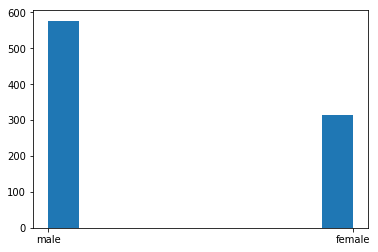

In [236]:
sex = np.array(df.select('Sex').collect())
plt.hist(sex)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

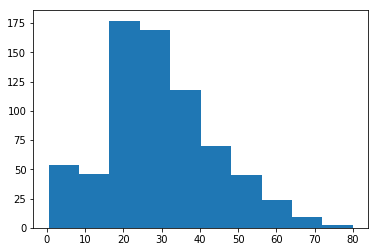

In [237]:
age = np.array(df.filter(df.Age > 0).select('Age').collect())
plt.hist(age)

In [241]:
correct = results.filter(results.Survived == results.prediction)

In [243]:
results.count()

213

In [244]:
correct.count()

176